In [1]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,HTML,Image
from z3 import *

### Puzzle as published 
https://www.janestreet.com/puzzles/hooks-index/

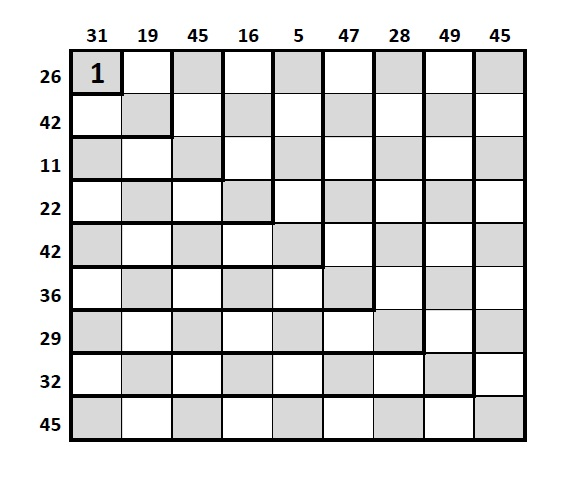

In [6]:
# Back to the first problem. Redoing with Z3
url='https://www.janestreet.com/puzzles/hooks-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published \n'+url))
display(HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1])))
display(Image('https://www.janestreet.com/puzzles/Feb14_Niedermaier.jpg',width=200))

**Solved in 0.2583 seconds. Answer is : 158**

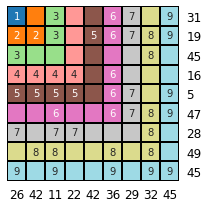

In [3]:
start =  time.time()
grid = np.zeros((9,9))
for (i,j),e in np.ndenumerate(grid):
    grid[i,j] = max(i,j)+1

row_labels = [31, 19, 45, 16, 5, 47, 28, 49, 45]
col_labels = [26, 42, 11, 22, 42, 36, 29, 32, 45]

X = np.array(IntVector("x",9*9),dtype=object).reshape((9,9))
s = Tactic('qffd').solver()

# constraints
s += [And(x>=0,x<=1) for _,x in np.ndenumerate(X)]
s += [np.sum(X[i,:]*grid[i,:])==e for i,e in enumerate(col_labels)]
s += [np.sum(X[:,i]*grid[:,i])==e for i,e in enumerate(row_labels)]
s += [PbEq([(e*int(grid[i,j])==n,1) for (i,j),e in np.ndenumerate(X)],n) for n in range(1,10)]

# Solve and print 
if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x:m.evaluate(x).as_long())
    r = evalu(X)
else:
    print("Failed")
    
display(Markdown("**Solved in {:.4f} seconds. Answer is : {:.0f}**".format(time.time()-start,
                                                                   sum([e for (i,j),e in np.ndenumerate(r*grid) if (i+j) % 2 ==0])
                                                                  )))
fig,ax = plt.subplots(1,1,figsize=(3,3))
pretty = np.vectorize(lambda x:str(int(x)).replace('0',''))
ax = sns.heatmap(grid,annot=pretty(r*grid),fmt='',cbar=False,cmap="tab20",linecolor='k',linewidth=2,
                 xticklabels=col_labels, yticklabels=row_labels, annot_kws={"fontsize":10})
ax.tick_params(left=False, bottom=False,labelleft=False, labelright=True)
plt.xticks(rotation=0,fontsize =12)
plt.yticks(rotation=0,fontsize =12)
plt.tight_layout()
plt.show()

### Solution as published 
https://www.janestreet.com/puzzles/hooks-solution/

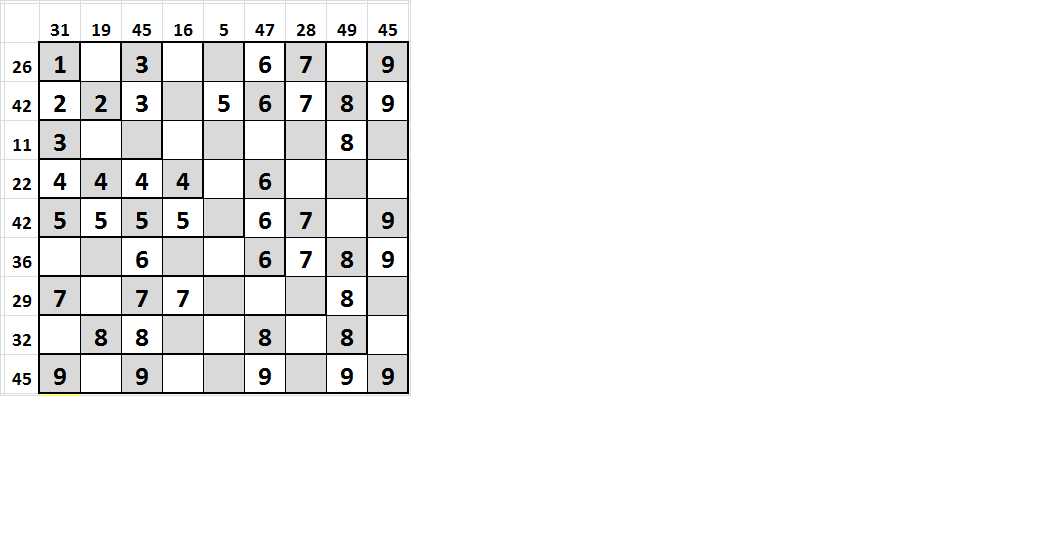

In [7]:
url='https://www.janestreet.com/puzzles/hooks-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Solution as published \n'+url))
display(HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1])))
display(Image('https://www.janestreet.com/puzzles/Feb14_Solution.png',width=500))